Bag of Word model using PyTorch



# 1)-Importing key Modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
! pip install torch

In [0]:
import pandas as pd
from collections import defaultdict
import time
import random
import numpy as np

import torch
from torch import nn
from torch.autograd import Variable

In [0]:
# helper file

from model import BoW

In [8]:
! pip install version_information

  Created wheel for version-information: filename=version_information-1.0.3-cp36-none-any.whl size=3880 sha256=6ccd13c89048addd2da257888b2a768736dced037c6b73730f4956992d9769a4
  Stored in directory: /root/.cache/pip/wheels/1f/4c/b3/1976ac11dbd802723b564de1acaa453a72c36c95827e576321
Successfully built version-information


In [9]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,torch,numpy

Software versions
Python 3.6.8 64bit [GCC 8.3.0]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.25.3
torch 1.3.1+cu100
numpy 1.17.3
Mon Nov 11 16:35:23 2019 UTC

# 2)- Loading Data

In [10]:
df_train = pd.read_fwf('train.txt', sep='|||', names=['sentiment','sep','text','NaN'])
df_train.shape

(8544, 4)

In [11]:
df_train.head()

,sentiment,sep,text,NaN
0,3,|||,The Rock is destined to be the 21st Century 's...,NaN
1,4,|||,The gorgeously elaborate continuation of `` Th...,NaN
2,3,|||,Singer\/composer Bryan Adams contributes a sle...,NaN
3,2,|||,You 'd think by now America would have had eno...,NaN
4,3,|||,Yet the act is still charming here .,NaN


In [12]:
df_train.sentiment.value_counts()

3    2322
1    2218
2    1624
4    1288
0    1092
Name: sentiment, dtype: int64

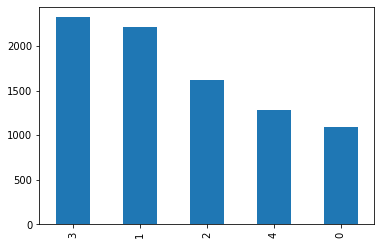

In [13]:
df_train.sentiment.value_counts().plot(kind='bar')

### loading data using traditional format
using open()

In [0]:
# Functions to read in the corpus
w2i = defaultdict(lambda: len(w2i))
t2i = defaultdict(lambda: len(t2i))
UNK = w2i["<unk>"]
def read_dataset(filename):
    with open(filename, "r") as f:
        for line in f:
            tag, words = line.lower().strip().split(" ||| ")
            yield ([w2i[x] for x in words.split(" ")], t2i[tag])

In [0]:
# Read in the data
train = list(read_dataset("train.txt"))
w2i = defaultdict(lambda: UNK, w2i)
dev = list(read_dataset("test.txt"))

In [16]:
print(len(w2i))
print(len(dev))

18648
2210


In [0]:
nwords = len(w2i)
ntags = len(t2i)

# 3)- Initialze Model

In [0]:
model = BoW(nwords, ntags)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [0]:
type = torch.LongTensor
use_cuda = torch.cuda.is_available()

if use_cuda:
    type = torch.cuda.LongTensor
    model.cuda()

# 4)- Train Model



In [20]:
for ITER in range(100):
    # Perform training
    random.shuffle(train)
    train_loss = 0.0
    start = time.time()
    for words, tag in train:
        words = torch.tensor(words).type(type)
        tag = torch.tensor([tag]).type(type)
        scores = model(words)
        loss = criterion(scores, tag)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("iter %r: train loss/sent=%.4f, time=%.2fs" % (
                ITER, train_loss/len(train), time.time()-start))

iter 0: train loss/sent=1.4745, time=6.09s
iter 1: train loss/sent=1.1216, time=6.01s
iter 2: train loss/sent=0.9120, time=6.06s
iter 3: train loss/sent=0.7683, time=6.00s
iter 4: train loss/sent=0.6635, time=5.98s
iter 5: train loss/sent=0.5823, time=6.00s
iter 6: train loss/sent=0.5165, time=6.01s
iter 7: train loss/sent=0.4634, time=5.98s
iter 8: train loss/sent=0.4185, time=6.00s
iter 9: train loss/sent=0.3816, time=5.97s
iter 10: train loss/sent=0.3490, time=6.03s
iter 11: train loss/sent=0.3212, time=6.06s
iter 12: train loss/sent=0.2965, time=6.06s
iter 13: train loss/sent=0.2743, time=6.02s
iter 14: train loss/sent=0.2555, time=5.94s
iter 15: train loss/sent=0.2383, time=6.03s
iter 16: train loss/sent=0.2219, time=5.96s
iter 17: train loss/sent=0.2085, time=5.99s
iter 18: train loss/sent=0.1955, time=6.00s
iter 19: train loss/sent=0.1841, time=6.09s
iter 20: train loss/sent=0.1741, time=5.99s
iter 21: train loss/sent=0.1644, time=6.06s
iter 22: train loss/sent=0.1554, time=6.18

# 5)- Test Model

In [22]:
test_correct = 0.0
for words, tag in dev:
  words = torch.tensor(words).type(type)
  scores = model(words)[0].detach().cpu().numpy()
  predict = np.argmax(scores)
  if predict == tag:
    test_correct += 1
print("iter %r: test acc=%.4f" % (ITER, test_correct/len(dev)))

iter 99: test acc=0.3629
